In [109]:
import numpy as np
from sklearn.ensemble  import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# from sklearn import cross_validation, metrics
from sklearn import metrics
from sklearn import linear_model
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import statsmodels.api as sm
import statsmodels.regression.linear_model
from statsmodels.tools.tools import add_constant
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

%matplotlib inline

In [107]:
X = np.load('var.npy')
y = np.load('count.npy')
X[np.isnan(X)] = 0

In [103]:
X = add_constant(X)
X = cluster

In [104]:
# statsmodels.regression.linear_model.OLS
mod = statsmodels.regression.linear_model.OLS(y, X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     20.04
Date:                Tue, 11 Dec 2018   Prob (F-statistic):           7.59e-06
Time:                        21:56:40   Log-Likelihood:            -2.0229e+05
No. Observations:               38727   AIC:                         4.046e+05
Df Residuals:                   38725   BIC:                         4.046e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1603      0.333     45.566      0.0

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
rf0 = rfc(n_estimators=10, oob_score=True, random_state=10, max_features=4, n_jobs=4)
rf0.fit(X_train,y_train)
print (rf0.oob_score_)
# y_pred = rf0.predict(X_test)

# plt.figure(figsize=(6,6))
# im = plt.imshow(confusion_matrix(y_test, y_pred), interpolation='none')
# plt.show()

0.2321270281728138


/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: divide by zero encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])
/Users/hemingyi/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [57]:
sklearn_lasso = linear_model.Lasso(alpha=0.01,normalize=False)
model = sklearn_lasso.fit(X_train,y_train)
# predict_y = model.predict(X_poly)

predict_R2 = model.score(X_train,y_train,sample_weight=None)
print(predict_R2)

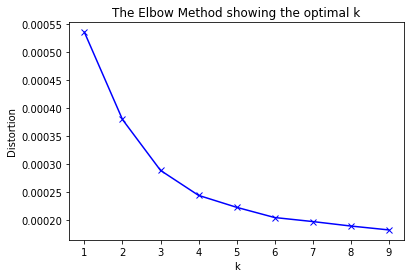

In [66]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [69]:
kmeans = KMeans(n_clusters=5, random_state=49).fit(X)
cluster = kmeans.labels_
center = kmeans.cluster_centers_

In [114]:
NN = 1000
how = 'distance'
knn = KNeighborsClassifier(NN, how)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.2884194053208138

In [116]:
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')

ModuleNotFoundError: No module named 'keras'